In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.read_edgelist('data_lab4/gr0.California.edges.txt')
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6175
Number of edges: 15969
Average degree:   5.1721


In [16]:
california_graph = G.subgraph(list(G.nodes())[100:150])
print(nx.info(california_graph))

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 42
Average degree:   1.6800


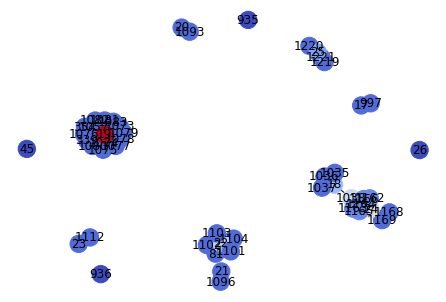

In [17]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(california_graph)
nx.draw(california_graph, cmap = plt.get_cmap('coolwarm'), node_color = values, with_labels = True)

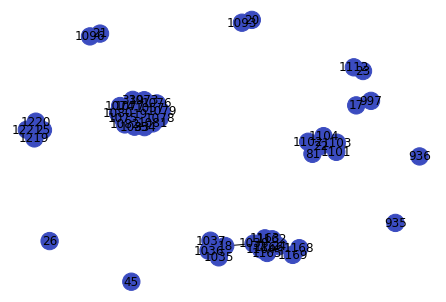

In [22]:
def pagerank_centrality(G, iter = 100):
    p = np.array([1 for i in list(G.nodes())])
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += G.number_of_edges(i, j) * p[j] / G.degree[j]
                except:
                    pass
        norm = sum(p)
        p = p / norm
    return p

values = pagerank_centrality(california_graph)
nx.draw(california_graph, cmap = plt.get_cmap('coolwarm'), node_color = values, with_labels = True)